<a href="https://colab.research.google.com/github/disath1554/--10/blob/main/%D0%A2%D0%B5%D0%BC%D0%B0_10_%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%A2%D0%B0%D0%B1%D0%BB%D0%B8%D1%87%D0%BD%D1%8B%D0%B5_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/neuralcomputer/ML_School.git

Cloning into 'ML_School'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 37 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (37/37), done.


# Тема № 10. Визуализация табличных данных

Многие данные, используемые в работе полезных приложений, представляются в виде таблиц. Таблицы сами по себе менее наглядны для человека, чем изображения, и это затрудняет их понимание и анализ. Визуализация табличных данных помогает более наглядно представить ту же информацию. При визуализации табличных данных большую роль играют различные группировки данных, взаимосвязи между ними, для этого предназначены разные типы графиков. 

Число инструментов для визуализации табличных данных велико, мы познакомимся с двумя: библиотеки [`seaborn`](https://seaborn.pydata.org/) и [`plotly`](https://plotly.com/python/). 

Для работы с таблицами будем использовать уже известную нам библиотеку [`pandas`](https://pandas.pydata.org/). Давайте подключим ее и загрузим какую-нибудь табличку. 

Для примера загрузим (`pd.read_csv()`) данные из файла `Video_Games_Sales_as_at_22_Dec_2016.csv` формата csv. 
В этом файле содержатся данные о продажах видео-игр на 2016 год. Там 16 столбцов, среди них:
```
'Name'             - название игры
'Platform'         - платформа, на которой она работает
'Year_of_Release'  - год выпуска
'Genre'            - жанр
'Global_Sales'     - количество продаж в мире
'Critic_Score'     - оценка критиками (проверяющими)
'Critic_Count'     - число критиков
'User_Score'       - оценка игроками
'User_Count'       - число игроков
'Rating'           - рейтинг игры
'Developer'        - разработчик
'Publisher'        - издатель
и столбы по продажам по отдельным странам\регионам NA_Sales, EU_Sales, JP_Sales, Other_Sales, 
```

In [ ]:
# будем отображать графики внутри ноутбука
%matplotlib inline 
#увеличим размер по умолчанию рисуемых графиков 
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
# pylab часть matplotlib, но ее уже не рекомендуют использовать. Пока же работает.
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

In [ ]:
import pandas as pd # подключаем pandas

In [ ]:
# Читаем данные из файла
df = pd.read_csv('ML_School/Video_Games_Sales_as_at_22_Dec_2016.csv') # read_csv читает данные из csv файла
df.info() # посмотрим на информацию о содержимом и типе значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


Из загруженных данных отбросим строки, в которых есть пропущенные значения (`df.dropna()`).

In [ ]:
df = df.dropna() # отбросим строки с пропущенными данными
print(df.shape) # посмотрим, сколько осталось

(6825, 16)


Преобразуем столбцы, которые содержат числа, в числовой тип. В pandas к столбцу можно обращаться по его названию и через "индекс" используя квадратные скобки `[ ]` (сравни с числовыми массивами, только вместо числового индекса указываем символьный), и через указание имени поля с помощью оператора `.`. Ниже оба этих способов использованы.  

In [ ]:
df['User_Score'] = df.User_Score.astype('float64') # преобразуем в число с плавающей точкой
df['Year_of_Release'] = df.Year_of_Release.astype('int64') # преобразуем в целое число
df['User_Count'] = df.User_Count.astype('int64') # преобразуем в целое число
df['Critic_Count'] = df.Critic_Count.astype('int64') # преобразуем в целое число

# Этого можно не делать, так как данные столбца Critic_Score уже float64 
# df['Critic_Score'] = df.Critic_Score.astype('float64') # преобразуем в число с плавающей точкой. 
# столбцы *Sales также не трогаем, они уже в float64

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   int64  
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   int64  
 12  User_Score       6825 non-null   float64
 13  User_Count       6825 non-null   int64  
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(7), int64(3), object(6)
memory usage: 906.4+ KB


Посмотрим на содержимое некоторых столбцов, отобразив краткое содержимое (по умолчанию 5 строк) с помощью метода `head()` указав ему интересующие нас столбцы.

In [ ]:
# названия столбцов
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
              ]
df[useful_cols].head() # отображаем их

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E


Отберем только столбцы, содержащие данные о продажах (название содержит подстроку 'Sales'), и столбец с годом выпуска игры.  Для этого в цикле просмотрим все названия столбцов из `df.columns`  и вернем только те, которые содержат `'Sales'` и объединим результат с названием столбца года выпуска `'Year_of_Release'`. 

In [ ]:
# выбираем столбцы содержащие Sales и Year_of_Release
sales_df = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]
sales_df # посмотрим на них

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_of_Release
0,41.36,28.96,3.77,8.45,82.53,2006
2,15.68,12.76,3.79,3.29,35.52,2008
3,15.61,10.93,3.28,2.95,32.77,2009
6,11.28,9.14,6.50,2.88,29.80,2006
7,13.96,9.18,2.93,2.84,28.92,2006
...,...,...,...,...,...,...
16667,0.01,0.00,0.00,0.00,0.01,2001
16677,0.01,0.00,0.00,0.00,0.01,2002
16696,0.00,0.01,0.00,0.00,0.01,2014
16700,0.01,0.00,0.00,0.00,0.01,2011


Посчитаем суммарные продажи по годам (столбец `Year_of_Release`), используя метод `.groupby()` для объединения данных с одинаковым годом  выпуска  в группы и `.sum()` для суммирования по группам.

In [ ]:
summarized_sales_df=sales_df.groupby('Year_of_Release').sum() # группируем по годам 
summarized_sales_df # отображаем

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year_of_Release,,,,,
1985,0.00,0.03,0.00,0.01,0.03
1988,0.00,0.02,0.00,0.01,0.03
1992,0.02,0.00,0.00,0.00,0.03
1994,0.39,0.26,0.53,0.08,1.27
1996,7.91,6.88,4.06,1.24,20.10
1997,15.34,8.67,9.01,2.02,35.01
1998,18.13,12.13,10.81,2.14,43.18
1999,23.32,15.69,9.67,2.45,51.17
2000,39.34,25.20,11.27,5.49,81.24


Pandas позволяет визуализировать свои объекты, с помощью `matplotlib` используя команду `plot()`, которой мы можем указать тип графика и его параметры. По умолчанию - линейчатый график, можно и другие типы (bar - полосчатый). 

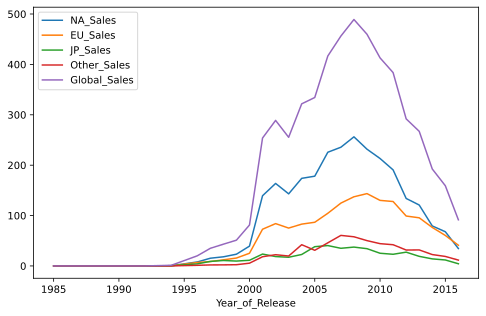

In [ ]:
summarized_sales_df.plot() # нарисуем график продаж по годам, линейчатый график

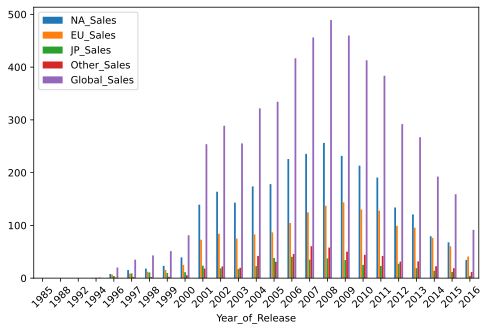

In [ ]:
summarized_sales_df.plot(kind='bar', rot=45) # то же, но полосчатый график, аргумент rot - угол поворота текста в подписи оси


## Библиотека `seaborn`
Эта библиотека основана на `matplotlib` и имеет богатые возможности по визуализации, познакомимся с некоторыми их них, но, конечно, их гораздо больше.

In [ ]:
import seaborn as sns # подключим библиотеку

[`pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot) -  строит набор графиков попарных зависимостей значений одного столбца от другого. Т.е. по одной оси будут отложены значения из одного столбца таблицы, а по другой оси - из другого столбца таблицы. Так делается для всех сочетаний из двух столбцов. Отображаться будут в виде квадратной матрицы, внутри клетки которой график соответствующей зависимости. Для диагональных элементов (зависимость столбца от самого себя - бесполезный график) будет показана гистограмма значений этого столбца (зависит от настроек).   

Давайте посмотрим, как связаны между собой столбцы 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count'.

Когда число отображаемых объектов велико (а у нас N^2 графиков, N-число столбцов, в каждом из которым много точек) Jupyter Notebook в браузере может "подвисать", если так случилось, подавим вывод на экран с помощью "магической" команды `%%capture` и будем сохранять график, а не выводить его на экран. Метод `.savefig()` позволяет сохранить график в файл.


In [ ]:
%%capture 
# Закоментируйте %%capture если график не "подвисает"

# выбранные столбцы
cols = ['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']

sns_plot = sns.pairplot(df[cols]);# рисуем график
sns_plot.savefig('pairplot.png')#сохраняем его в файл


`distplot()` рисует гистограмму распределения заданного столбца. 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


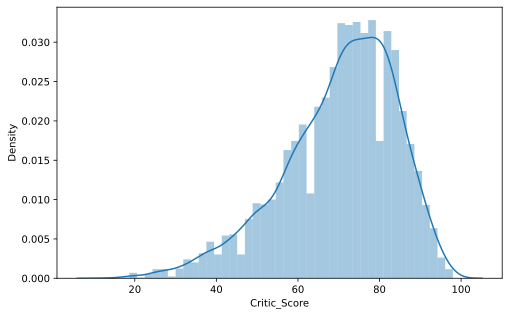

In [ ]:
sns.distplot(df.Critic_Score)


Для отображения распределений значений по категориям удобен график ["ящик с усами"](https://ru.wikipedia.org/wiki/Ящик_с_усами) (не с ушами, а с усами). Он также отображает распределения значений, но в особой форме. Значения между  первым Q1 и третьим Q3 [квартилем](https://ru.wikipedia.org/wiki/Квантиль#Медиана_и_квартили) (0.25 и 0.75 [квантилем](https://ru.wikipedia.org/wiki/Квантиль) , вспомните, мы уже говорили про квантили) отображается в виде ящика, медиана (иногда среднее значение) отображается линией внутри этого ящика, "усы" ящика соответствуют значениям   
``` X1=Q1-k*(Q3-Q1) и X2=Q3+k*(Q3-Q1)```, k- коэффициент, по умолчанию 1.5, передается в аргументе `whis=`. Значения, не попавшие внутрь "усов" (выбросы) отображаются как есть.

Давайте построим такой график для распределения значений столбца "Critic_Score" по типам платформ в столбце "Platform" (5 наиболее популярных). 

Сначала сформируем список самых популярных платформ `top_platforms`:
* для столбца `df.Platform` посчитаем количество разных значений с помощью `value_counts()`
* результат отсортируем по убыванию с помощью `sort_values(ascending = False)`
* возьмем из результата сортировки только 5 первых, а значит наиболее популярных, раз мы отсортировали значения по убыванию с помощью `head(5)`
* нам нужны названия платформ, они хранятся в индексе этого DataFrame, извлечем их, поле `index`
* но при этом вернулся объект Index, нам же нужен массив `array`, поэтому извлечем значения в массив из поля `values`.
В результате получили массив названий самых популярных платформ.

Для отображения "ящика с усами" используем функцию `boxplot()`, которой указываем, что, какой столбец, отображать по горизонтальной (`x=`) и вертикальной (`y=`) осям, данные, откуда эти столбцы будут извлекаться, аргумент `data=`. Нам нужны только данные для самых популярных платформ, поэтому отберем только такие, для которых значение столбца `df.Platform` совпадает с одним из значений в `top_platforms` (метод `isin()`). Также укажем ориентацию нашего графика `orient="h"` - горизонтально, необязательный параметр. 

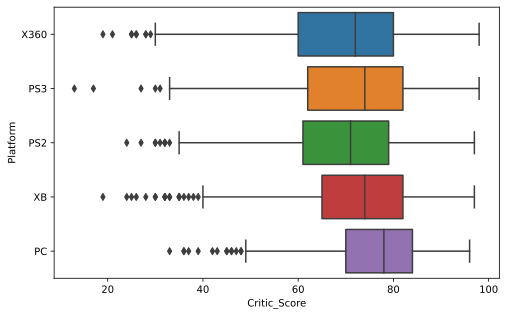

In [ ]:
top_platforms = df.Platform.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y="Platform", x="Critic_Score", data=df[df.Platform.isin(top_platforms)], orient="h")

Другой полезный график для отображения таблиц - само изображение таблицы с подсветкой значений цветом, соответствующих их величине. Выполняется командой `heatmap()`, которой указываем таблицу и дополнительные параметры отображения, например:
* `annot=True`, - подписывать значение клеточек таблицы
* `fmt=".1f"` - в каком виде выводить числа (здесь число с плавающей точкой, один знак после запятой,
* `linewidths=.5` - толщина линий, разделяющих клеточки таблицы.
По умолчанию будет показана и цветовая шкала.

Давайте создадим таблицу, показывающую сколько игр разных жанров вышло на каждой из платформ. Для этого мы воспользуемся командой pandas `pivot_table()`. Ей необходимо указать:

```
* index='Platform' - что считать строками таблицы (индексом)  
* columns='Genre' - что считать столбцами таблицы
* values='Global_Sales'  - что считать значениями клеточки таблицы, записанными на пересечении строки и столбца
* aggfunc=sum - как объединять значения values с совпадающими индексами index и columns. В нашем примере - суммировать sum 
```

Какие-то клеточки таблицы могут оказаться пустыми (игра такого жанра никогда не выходила на такой платформе), на этот случай отсутствующие элементы заменим на 0, метод `fillna(0)`.

На всякий случай, чтобы гарантировать, что в таблице записаны числа, все значения переведем в тип `float`. Команда `applymap()` может применить любую функцию к каждому элементу таблицы, мы применим `float`.


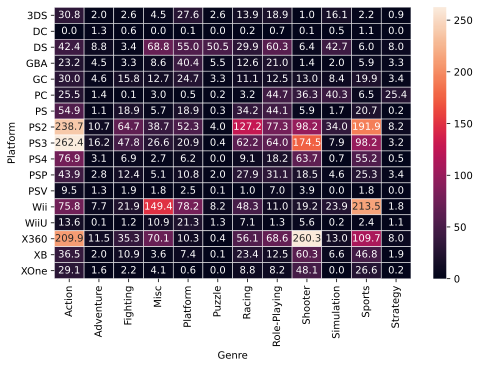

In [ ]:
platform_genre_sales = df.pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5)

Другие возможности библиотеки смотрите в документации.

## Библиотека `plotly`
 Библиотека [`plotly`](https://plotly.com/python/) предназначена для построения *интерактивных* графиков. Поддерживает все основные типы графиков и работу со многими средствами вычислений:  Jupyter Notebook, Kaggle kernels, Azure Notebooks, Google Colab и др.
 
 Подключим библиотеку и необходимые инструменты из нее.

In [ ]:

from plotly.offline import download_plotlyjs, plot, iplot
import plotly.graph_objs as go # графические объекты




Давайте посчитаем число вышедших игр и проданных копий по годам. Для этого:
* сгруппируем наши данные по 'Year_of_Release' с помощью `groupby()`,
  выберем оттуда только столбец 'Global_Sales' просуммировав внутри группы, `sum()` (т.е. по году)
* сгруппируем наши данные по 'Year_of_Release' с помощью `groupby()`,
  выберем оттуда только столбец 'Name' просуммировав внутри группы, `sum()` (т.е. по году)
* объединим эти два столбца - с помощью `join()` подсоединим второй столбец к первому.
* назовем эти два столбца, поле `columns = ['Global_Sales', 'Number_of_Games']` 

In [ ]:
# посчитаем число вышедших игр и проданных копий по годам
years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum().join(
    df.groupby('Year_of_Release')[['Name']].count()
)
years_df.columns = ['Global_Sales', 'Number_of_Games']
years_df

,Global_Sales,Number_of_Games
Year_of_Release,,
1985,0.03,1
1988,0.03,1
1992,0.03,1
1994,1.27,1
1996,20.10,7
1997,35.01,13
1998,43.18,25
1999,51.17,30
2000,81.24,102


Теперь создадим графический объект - линию для числа проданных копий, с помощью команды `Scatter()` (именно с большой буквы).

Укажем
```
x=years_df.index, - значения для горизонтальной оси
y=years_df.Global_Sales, - значения для вертикальной оси
name='Global Sales' - название линии
```

Аналогично создадим графический объект -  линию для числа вышедших игр  "Number_of_Games"

Объединим эти объекты (квадратными скобками), зададим свойства графика в виде словаря (назвали его `layout`). В этом примере зададим название графика: `{'title': 'Statistics of video games'}`

Создаем полотно, объект `Figure`, которому указываем:
```
data = графические объекты, которые должны быть на этом полотне
layout = параметры графика
```
и визуализируем его командой `iplot()` 

Получим интерактивный график. 

In [ ]:
# создаем линию для числа проданных копий
trace0 = go.Scatter(
    x=years_df.index,
    y=years_df.Global_Sales,
    name='Global Sales'
)

# создаем линию для числа вышедших игр 
trace1 = go.Scatter(
    x=years_df.index,
    y=years_df.Number_of_Games,
    name='Number of games released'
)
# объединяем графические объекты и задаем title графика в layout
data = [trace0, trace1]
layout = {'title': 'Statistics of video games'}

# cоздаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
#fig.show()
iplot(fig, show_link=False) # не показывать ссылку на экспортирование полотна


То же полотно можно сохранить в HTML файл, который всегда можно открыть в браузере, команда `plot()`, указываем ей полотно, имя файла `filename=` и другие аргументы. 

In [ ]:
plot(fig, filename='years_stats.html', show_link=False)

'years_stats.html'

Столбчатый график строится аналогично.

Давайте для примера посчитаем число проданных и вышедших игр по платформам, столбец 'Platform' (аналогично предыдущему примеру). Отсортируем результат по убыванию `sort_values()`, `inplace=True` означает, что мы отсортируем именно этот массив, не создавая отсортированную копию. 

Создадим графические объекты столбчатого графика для обоих столбцов наших данных, команда `Bar()`, аргументы аналогичны.

Создадим полотно, отобразим его.

In [ ]:
# считаем число проданных и вышедших игр по платформам
platforms_df = df.groupby('Platform')[['Global_Sales']].sum().join(
    df.groupby('Platform')[['Name']].count()
)
platforms_df.columns = ['Global_Sales', 'Number_of_Games']
platforms_df.sort_values('Global_Sales', ascending=False, inplace=True)

# создаем объект для визуализации
trace0 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Global_Sales,
    name='Global Sales'
)

# создаем объект для визуализации
trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Number_of_Games,
    name='Number of games released'
)

# объединяем графические объекты и задаем title графика в layout
data = [trace0, trace1]
layout = {'title': 'Share of platforms', 'xaxis': {'title': 'platform'}}

# создаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

Нарисуем "ящик с усами" для распределения "Critic_Score" по жанрам "Genre".

Все жанры, которые есть в данных получим командой `unique()` для столбца "Genre".

В цикле по жанрам создаем и объединяем (`append()`) графические объекты ящика из значений Critic_Score только для таких строк, у которых жанр совпадает с текущим (`[df.Genre==genre]`). Название ящика - название жанра.

Если менять параметры полотна не надо, его можно не создавать отдельно и визуализировать объединенный массив графических объектов.

In [ ]:
# создаем ящик с усами для каждого жанра из наших данных
data = [] # пустой массив который будем постепенно заполнять.
for genre in df.Genre.unique(): #
    data.append(
        go.Box(y=df[df.Genre==genre].Critic_Score, name=genre)
    )
# пропускаем создание полотна
    
# визуализируем данные
iplot(data, show_link = False)

# Обсуждение, задания.
Возможности библиотек по визуализации данных гораздо шире, чем мы успели изучить. Читайте документацию, смотрите примеры, это поможет отображать нужные вам данные красиво и наглядно.

Для упражнения, создайте и визуализируйте таблицу heatmap() не для платформ 'Platform',  а для издателей 'Publisher'.